<a href="https://colab.research.google.com/github/mmilannaik/BigOCheatSheet/blob/master/Miq_Lead_Scoring_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lead Scoring Case Study

## Note: The dataset and the workbook are on same directory

In [10]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Reading the dataset

edu_df1=pd.read_csv('/content/MiQ_03_Leads.csv',encoding='utf-8',engine='python')

edu_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Understanding

In [12]:
# Shape of the dataset

edu_df1.shape

(9240, 37)

The dataset is having 9240 rows and 37 columns

In [13]:
# let's view the data information like what are thew datatypes of the variables

edu_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As we can see from the above, there are 7 numerical variables columns and remaining 30 columns are having categorical variables.

In [14]:
# Let's describe the data and have some statistical idea about the dataset like outlers, mean, std etc.

edu_df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [15]:
edu_df1['City'].value_counts()

,count
City,
Mumbai,3222
Select,2249
Thane & Outskirts,752
Other Cities,686
Other Cities of Maharashtra,457
Other Metro Cities,380
Tier II Cities,74


In [16]:
edu_df1['Country'].value_counts()

,count
Country,
India,6492
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10
Hong Kong,7


As we can see from the above table, some variable columns like 'totalVisits','Total Time Spent on Website' and 'Page Views Per Visit' are having outliers while others not so much.

Now, from our above observations from two tables we can see that there are some count mismatch and also some columns are redundant. Hence, first we will try to remove those redundant columns and after that we will check the missing values in the dataset.

# Cleaning the dataset

In [17]:
# Dropping redundant columns like 'Prospect ID','Lead Number','Country',
# 'I agree to pay the amount through cheque' and 'a free copy of Mastering The Interview'

red_cols=['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','City']

edu_df=edu_df1.drop(red_cols,axis=1)



In [18]:
edu_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified


Now, there are some columns/categorical variables having label as 'Select' which means the customer was not selected any option hence it is better to put it as null value - Because there was no suitable option present to select for the customer searching for.

**Let's find out which columns/categories is having 'Select' label**

In [19]:
# Creating a for loop and the required columns are appended into a new list

cols=list(edu_df.columns)
test=['Select']
text=[]
for i in range(len(cols)):
    if len(edu_df[cols[i]].isin(test).unique())>1:
        text.append(cols[i])

text # column names having label 'Select'

['Specialization', 'How did you hear about X Education', 'Lead Profile']

The columns' having 'Select' as a lable are **'Specialization', 'How did you hear about X Education', 'Lead Profile'.**

In [20]:
# Now replacing label 'Select' with nan values

# Copying the required columns in sepearate DataFrame

df_1=pd.DataFrame(edu_df['Specialization'])
df_2=pd.DataFrame(edu_df['How did you hear about X Education'])
df_3=pd.DataFrame(edu_df['Lead Profile'])

In [21]:
df_1

,Specialization
0,Select
1,Select
2,Business Administration
3,Media and Advertising
4,Select
...,...
9235,IT Projects Management
9236,Media and Advertising
9237,Business Administration
9238,Human Resource Management


In [22]:
# Replacing 'Select' label with nan values
#vals_to_replace = {'Select':np.nan}
df_1['Specialization'] = df_1['Specialization'].replace('Select',np.nan,regex=True)
df_2['How did you hear about X Education'] = df_2['How did you hear about X Education'].replace('Select',np.nan,regex=True)
df_3['Lead Profile'] = df_3['Lead Profile'].replace('Select',np.nan,regex=True)
#df_1=df_1.replace(df_1.loc[df_1['Specialization']=='Select'],value=None)
# df_2=df_2.replace(df_2.loc[df_2['How did you hear about X Education']=='Select'],value=np.nan)
# df_3=df_3.replace(df_3.loc[df_3['Lead Profile']=='Select'],value=np.nan)

In [23]:
df_1['Specialization'].value_counts()

,count
Specialization,
Finance Management,976
Human Resource Management,848
Marketing Management,838
Operations Management,503
Business Administration,403
IT Projects Management,366
Supply Chain Management,349
"Banking, Investment And Insurance",338
Media and Advertising,203


In [24]:
round(df_1['Specialization'].isnull().sum()/len(df_1['Specialization'])*100,2)

np.float64(36.58)

In [25]:
# After replacing in temporary dataframe, we update our original dataset with new set of data from dataset df_1

edu_df['Specialization']=df_1['Specialization']
edu_df['How did you hear about X Education']=df_2['How did you hear about X Education']
edu_df['Lead Profile']=df_3['Lead Profile']

**Now, we have replaced the label 'Select' with null values**

In [26]:
p_s1 = edu_df.isnull().sum()/len(edu_df)*100

In [27]:
p_s1

,0
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684
Last Activity,1.114719
Specialization,36.580087


In [28]:
filter_p = p_s1[p_s1>30]
filter_p.index

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

From above percentage of columns shows that some columns are having **more than 30% of missing values**, so it is better to remove these columns because it is **not a great move** if we are imputing more than approx. 30% of data based on **predictions** and **assumptions**.

In [29]:
# Droping Columns having more than 30% of missing values

drop_cols=edu_df.isnull().sum()
drop_cols=drop_cols[drop_cols.values/len(edu_df)>0.30]
len(drop_cols)

9

Columns we found that are having 30% of missing values in the dataset, so let's get rid of them.

In [30]:
# Dropping 9 columns and checking the remaining columns for missing values

drop_columns=list(drop_cols.keys())
edu_df=edu_df.drop(drop_columns,axis=1)
round(edu_df.isnull().sum()/len(edu_df)*100,2)

,0
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11
What is your current occupation,29.11


The 9 columns were removed which were having **more than 30% of missing values**.

Now, for columns having **below 30% missing values** - let's **impute maximum number of occurences** for a particluar column where missing values are found.

In [31]:
# Let's start with first columns of missing values

edu_df['Lead Source'].value_counts().head(5)   # Lead Source column

,count
Lead Source,
Google,2868
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534


**Google** is having highest number of occurences, hence we will impute the missing values with label 'Google'

In [32]:
# TotalVisits column

edu_df['TotalVisits'].value_counts().head(5)

,count
TotalVisits,
0.0,2189
2.0,1680
3.0,1306
4.0,1120
5.0,783


**0.0** is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [33]:
edu_df['Page Views Per Visit'].value_counts().head(5)

,count
Page Views Per Visit,
0.0,2189
2.0,1795
3.0,1196
4.0,896
1.0,651


**0.0** is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [34]:
edu_df['Last Activity'].value_counts().head(5)

,count
Last Activity,
Email Opened,3437
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428


**Email Opened** is having highest number of occurences, hence we will impute the missing values with label 'Email Opened'

In [35]:
edu_df['What is your current occupation'].value_counts().head(5)

,count
What is your current occupation,
Unemployed,5600
Working Professional,706
Student,210
Other,16
Housewife,10


**Unemployed** is having highest number of occurences, hence we will impute the missing values with label 'Unemployed'

In [36]:
edu_df['What matters most to you in choosing a course'].value_counts().head(5)

,count
What matters most to you in choosing a course,
Better Career Prospects,6528
Flexibility & Convenience,2
Other,1


**Better Career Prospects** is having highest number of occurences, hence we will impute the missing values with label 'Better Career Prospects'

In [37]:
# Now, imputing these values in our missing values dataset for respective categories

missing_values={'Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed','What matters most to you in choosing a course':'Better Career Prospects'}

edu_df=edu_df.fillna(value=missing_values)


In [38]:
edu_df.isnull().sum()  # chekcing for missing values after imputing values to the missing area

,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0
What is your current occupation,0


**Now all columns are having no missing values, we are good to go for our next analysis**

In [39]:
edu_df['Lead Source'].value_counts()

,count
Lead Source,
Google,2904
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
bing,6


We found one column **'Lead Source'** is having same label name **'Google'** but in different format**('google')** so we need to make them in a same format hence using below commands.

In [40]:
# Applying lambda to captilize the first character of the column 'Lead Source'

edu_df['Lead Source']=edu_df['Lead Source'].apply(lambda x:x.capitalize())

edu_df['Lead Source'].value_counts()


,count
Lead Source,
Google,2909
Direct traffic,2543
Olark chat,1755
Organic search,1154
Reference,534
Welingak website,142
Referral sites,125
Facebook,55
Bing,6


Now, all data labels are in good shape and this is our final cleaning step of the dataset, we will proceed to our next step which is **Data Transformation**.

# Data Transformation

Assigning numerical variables to categories with **'Yes' to 1 and 'No' to 0** or **converting binary variables (Yes/No) to (1/0)**

In [41]:
# Yes : 1 , No : 0
category={"No":0,"Yes":1}    # creating dictionary for two categories
# Column 'Do Not Email'
edu_df['Do Not Email']=edu_df['Do Not Email'].map(category)
# Column 'Do Not Call'
edu_df['Do Not Call']=edu_df['Do Not Call'].map(category)
# Column 'Search'
edu_df['Search']=edu_df['Search'].map(category)
# Column 'Magazine'
edu_df['Magazine']=edu_df['Magazine'].map(category)
# Column 'Newspaper Article'
edu_df['Newspaper Article']=edu_df['Newspaper Article'].map(category)
# Column 'X Education Forums'
edu_df['X Education Forums']=edu_df['X Education Forums'].map(category)
# Column 'Newspaper'
edu_df['Newspaper']=edu_df['Newspaper'].map(category)
# Column 'Digital Advertisement'
edu_df['Digital Advertisement']=edu_df['Digital Advertisement'].map(category)
# Column 'Through Recommendations'
edu_df['Through Recommendations']=edu_df['Through Recommendations'].map(category)
# Column 'Receive More Updates About Our Courses'
edu_df['Receive More Updates About Our Courses']=edu_df['Receive More Updates About Our Courses'].map(category)
# Column 'Update me on Supply Chain Content'
edu_df['Update me on Supply Chain Content']=edu_df['Update me on Supply Chain Content'].map(category)
# Column 'Get updates on DM Content'
edu_df['Get updates on DM Content']=edu_df['Get updates on DM Content'].map(category)

After converting the binary categories from 'Yes' to 1 and 'No' to 0, **we will use now dummy variables for mutiple levels of categories.**

In [42]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [43]:
# Creating a dummy variables for 8 categories and dropping the first level.

dummy=pd.get_dummies(edu_df[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

# Adding these dummies to our original dataset

edu_df=pd.concat([edu_df,dummy],axis=1)

edu_df.shape

(9240, 83)

**Now, Removing duplicate columns or repeated columns**

In [44]:
# We have created dummies for below categories hence removing the original column

duplicates=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity']


edu_df=edu_df.drop(duplicates,axis=1)

edu_df.shape

(9240, 77)

In [45]:
# Dropping redundant variables

redundant=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']

edu_df=edu_df.drop(redundant,axis=1)

In [46]:
# Converting some categories to numercial as they are imported as an 'Object'
edu_df[['TotalVisits','Page Views Per Visit']] = edu_df[['TotalVisits','Page Views Per Visit']].apply(pd.to_numeric, errors='coerce')
#edu_df[['TotalVisits','Page Views Per Visit']]=edu_df[['TotalVisits','Page Views Per Visit']].convert_objects(convert_numeric=True)

edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

**From above it states that all variables are numericals**

## Checking for Outliers

In [47]:
round(edu_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,0.00,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,0.02,0.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35%,0.00,0.00,0.00,2.00,98.00,1.50,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,3.00,248.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
55%,0.00,0.00,0.00,3.00,305.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,5.00,936.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,1.00,0.00,1.00,10.00,1562.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00


As we can see there are outliers in 2 variables **'TotalVisits' and 'Page Views Per Visit'**.

Let's visualize the outliers using boxplot to understand the outliers.

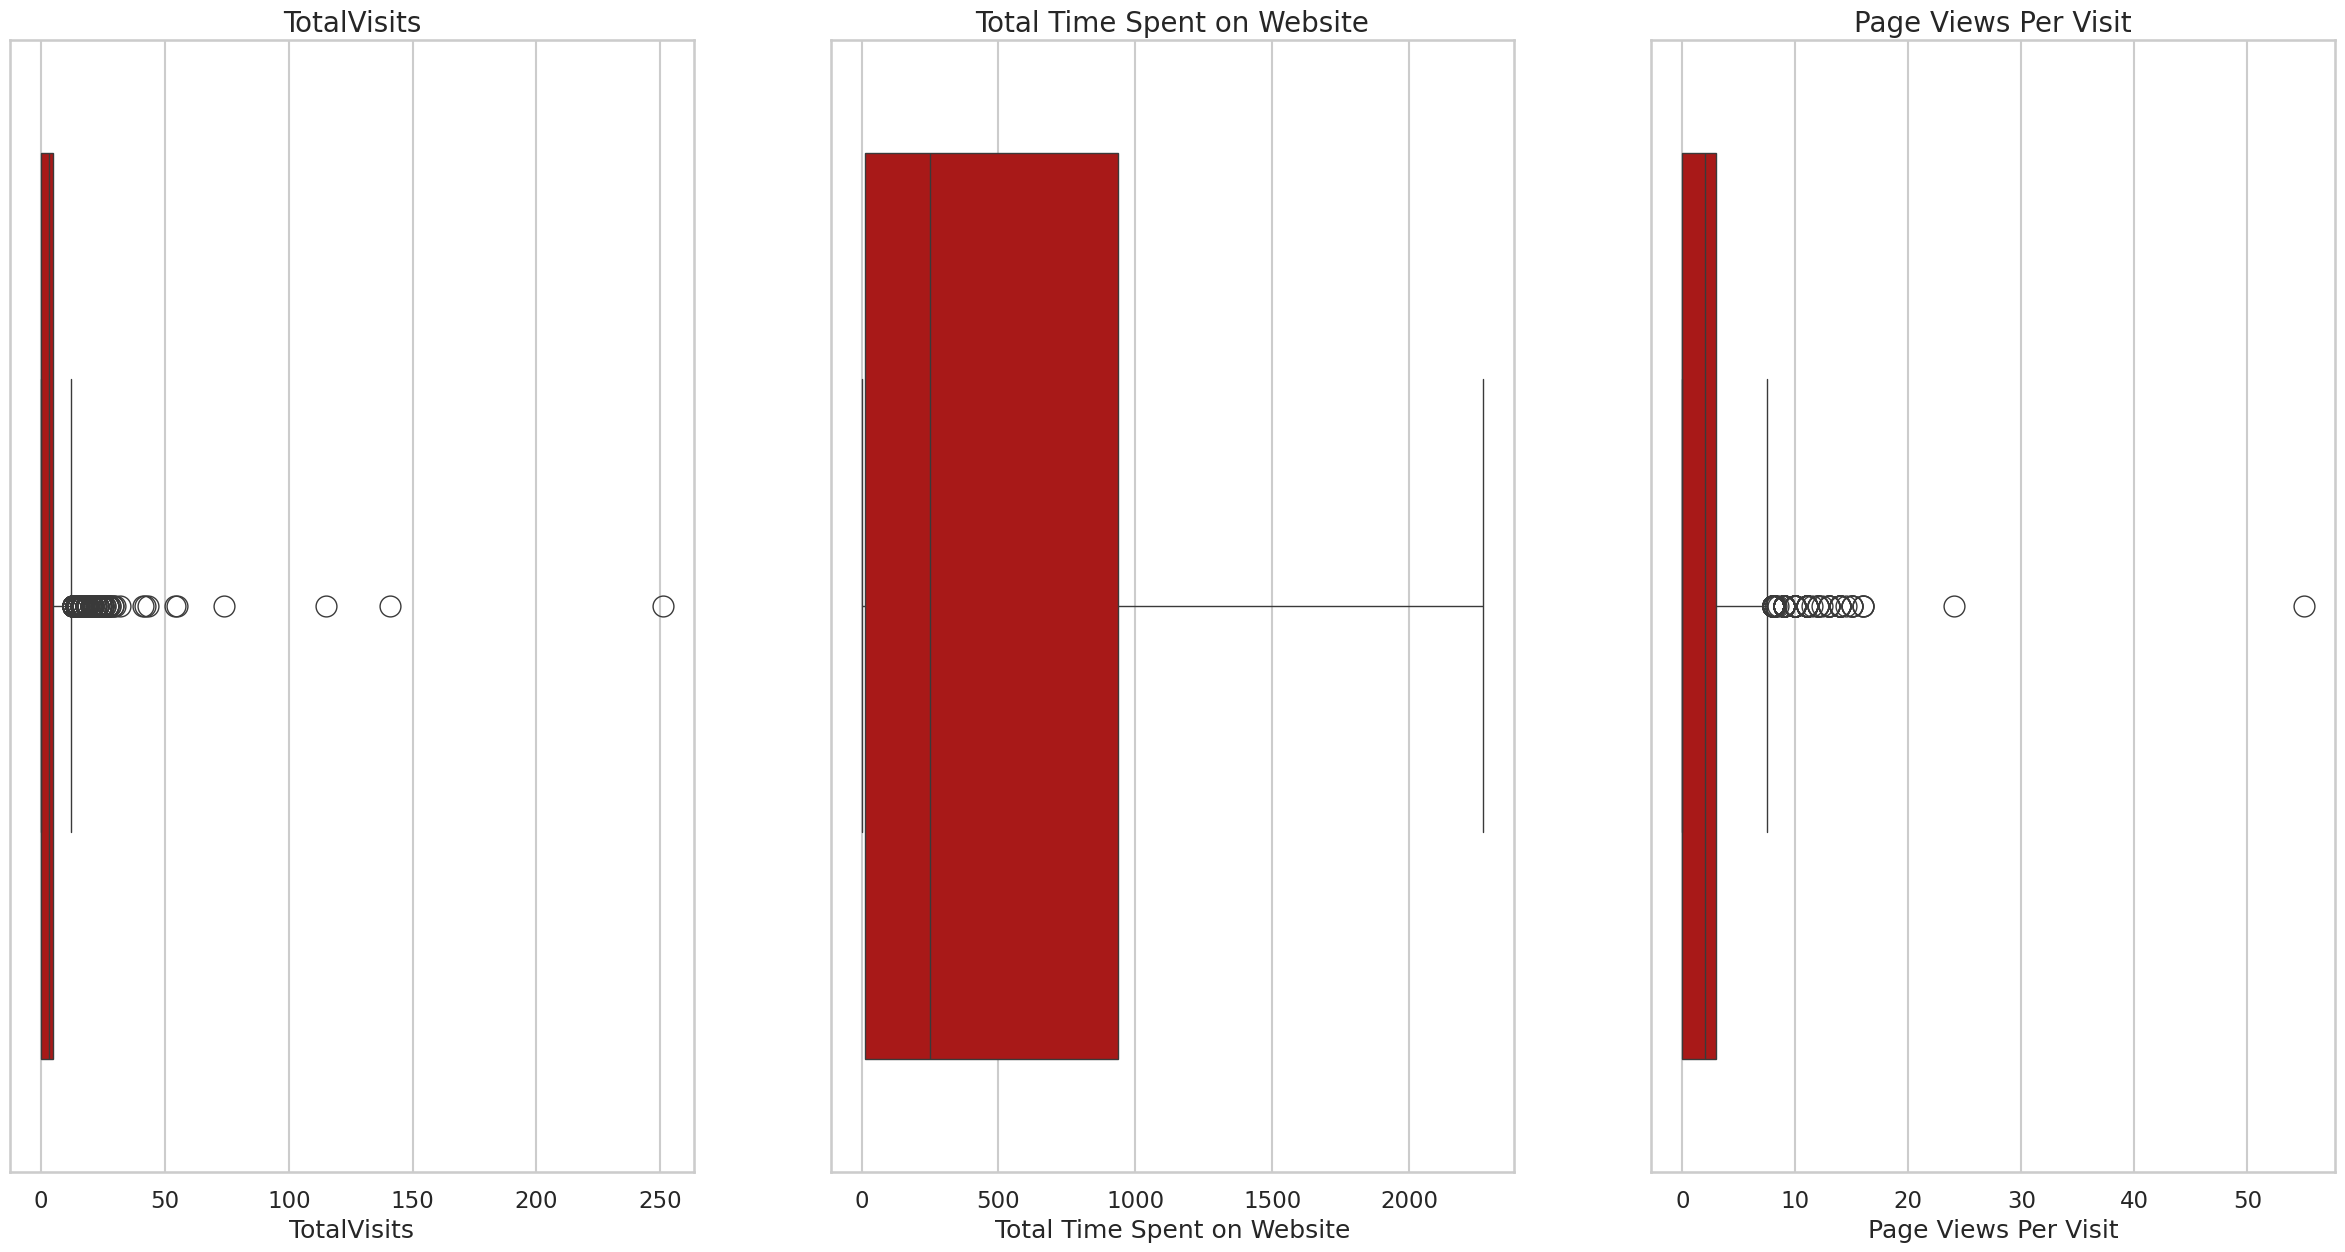

In [48]:
# Setting size of figure, context and gridlines

plt.figure(figsize=(30,50))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Title names for the columns in the dataset

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=edu_df[col[i]],data=edu_df,palette='gist_heat',orient='v',fliersize=15)  # using boxplot




From the above boxplots we can now confirm that we have two outlier variables in our dataset **('TotalVisits' and 'Page Views Per Visit')**. Now as per business requirement we cannot drop these outliers because it may impact our analysis/model so we will **create bins** for these two outliers.

### Creating bins

In [49]:
# For 'TotalVisits' variable

# As we have range from 0 to 251 for'TotalVisits' variable

ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits.keys()))):
    edu_df[list(ranges_total_visits.keys())[i]]=edu_df['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

In [50]:
# For 'Page Views Per Visit' variable

# As we have range from 0 to 55 for'Page Views Per Visit' variable

ranges_total_visits_1={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits_1.keys()))):
    edu_df[list(ranges_total_visits_1.keys())[i]]=edu_df['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)

From above, creating bins surely removed the outliers and hence we are now good to go. Before going to another step let's remove redundant columns/varaibles.

In [51]:
redundant=['TotalVisits','Page Views Per Visit','TotalVisits_150_200',
           'TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']

edu_df=edu_df.drop(redundant,axis=1)

edu_df.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,False,False,1,0,0,0,1,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,False,False,1,0,0,0,1,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,False,False,1,0,0,0,1,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,False,False,1,0,0,0,1,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,False,False,1,0,0,0,1,0,0,0


# Data Preparation

### Train-Test Split

In [52]:
# Importing train-test-split method from sklearn - model selection

from sklearn.model_selection import train_test_split

In [53]:
# Separating target varaible from dependent variable

y=edu_df['Converted']     # putting target varaible 'Converted' to a new series 'y'

y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [54]:
# Putting dependent variable in a new dataset called 'X'

X=edu_df.drop('Converted',axis = 1)

X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,False,...,False,False,1,0,0,0,1,0,0,0
1,0,0,674,0,0,0,0,0,0,False,...,False,False,1,0,0,0,1,0,0,0
2,0,0,1532,0,0,0,0,0,0,True,...,False,False,1,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,True,...,False,False,1,0,0,0,1,0,0,0
4,0,0,1428,0,0,0,0,0,0,True,...,False,False,1,0,0,0,1,0,0,0


In [55]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Standardization

In [56]:
# Importing Standard Scaler method from sklearn - preprocessing library

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()  # Creating an object

In [57]:
# Now, Scalling the 'Total Time Spent on Website' variables with standard scaler and fitting - tranforming the X - train dataset

X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()


,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,False,...,False,False,1,0,0,0,1,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,True,...,False,False,1,0,0,0,1,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,False,...,False,False,1,0,0,0,1,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,True,...,False,False,1,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,False,...,False,False,1,0,0,0,1,0,0,0


In [58]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.53896103896104

We have conversion rate of almost 39%

### Correlation of the dataset

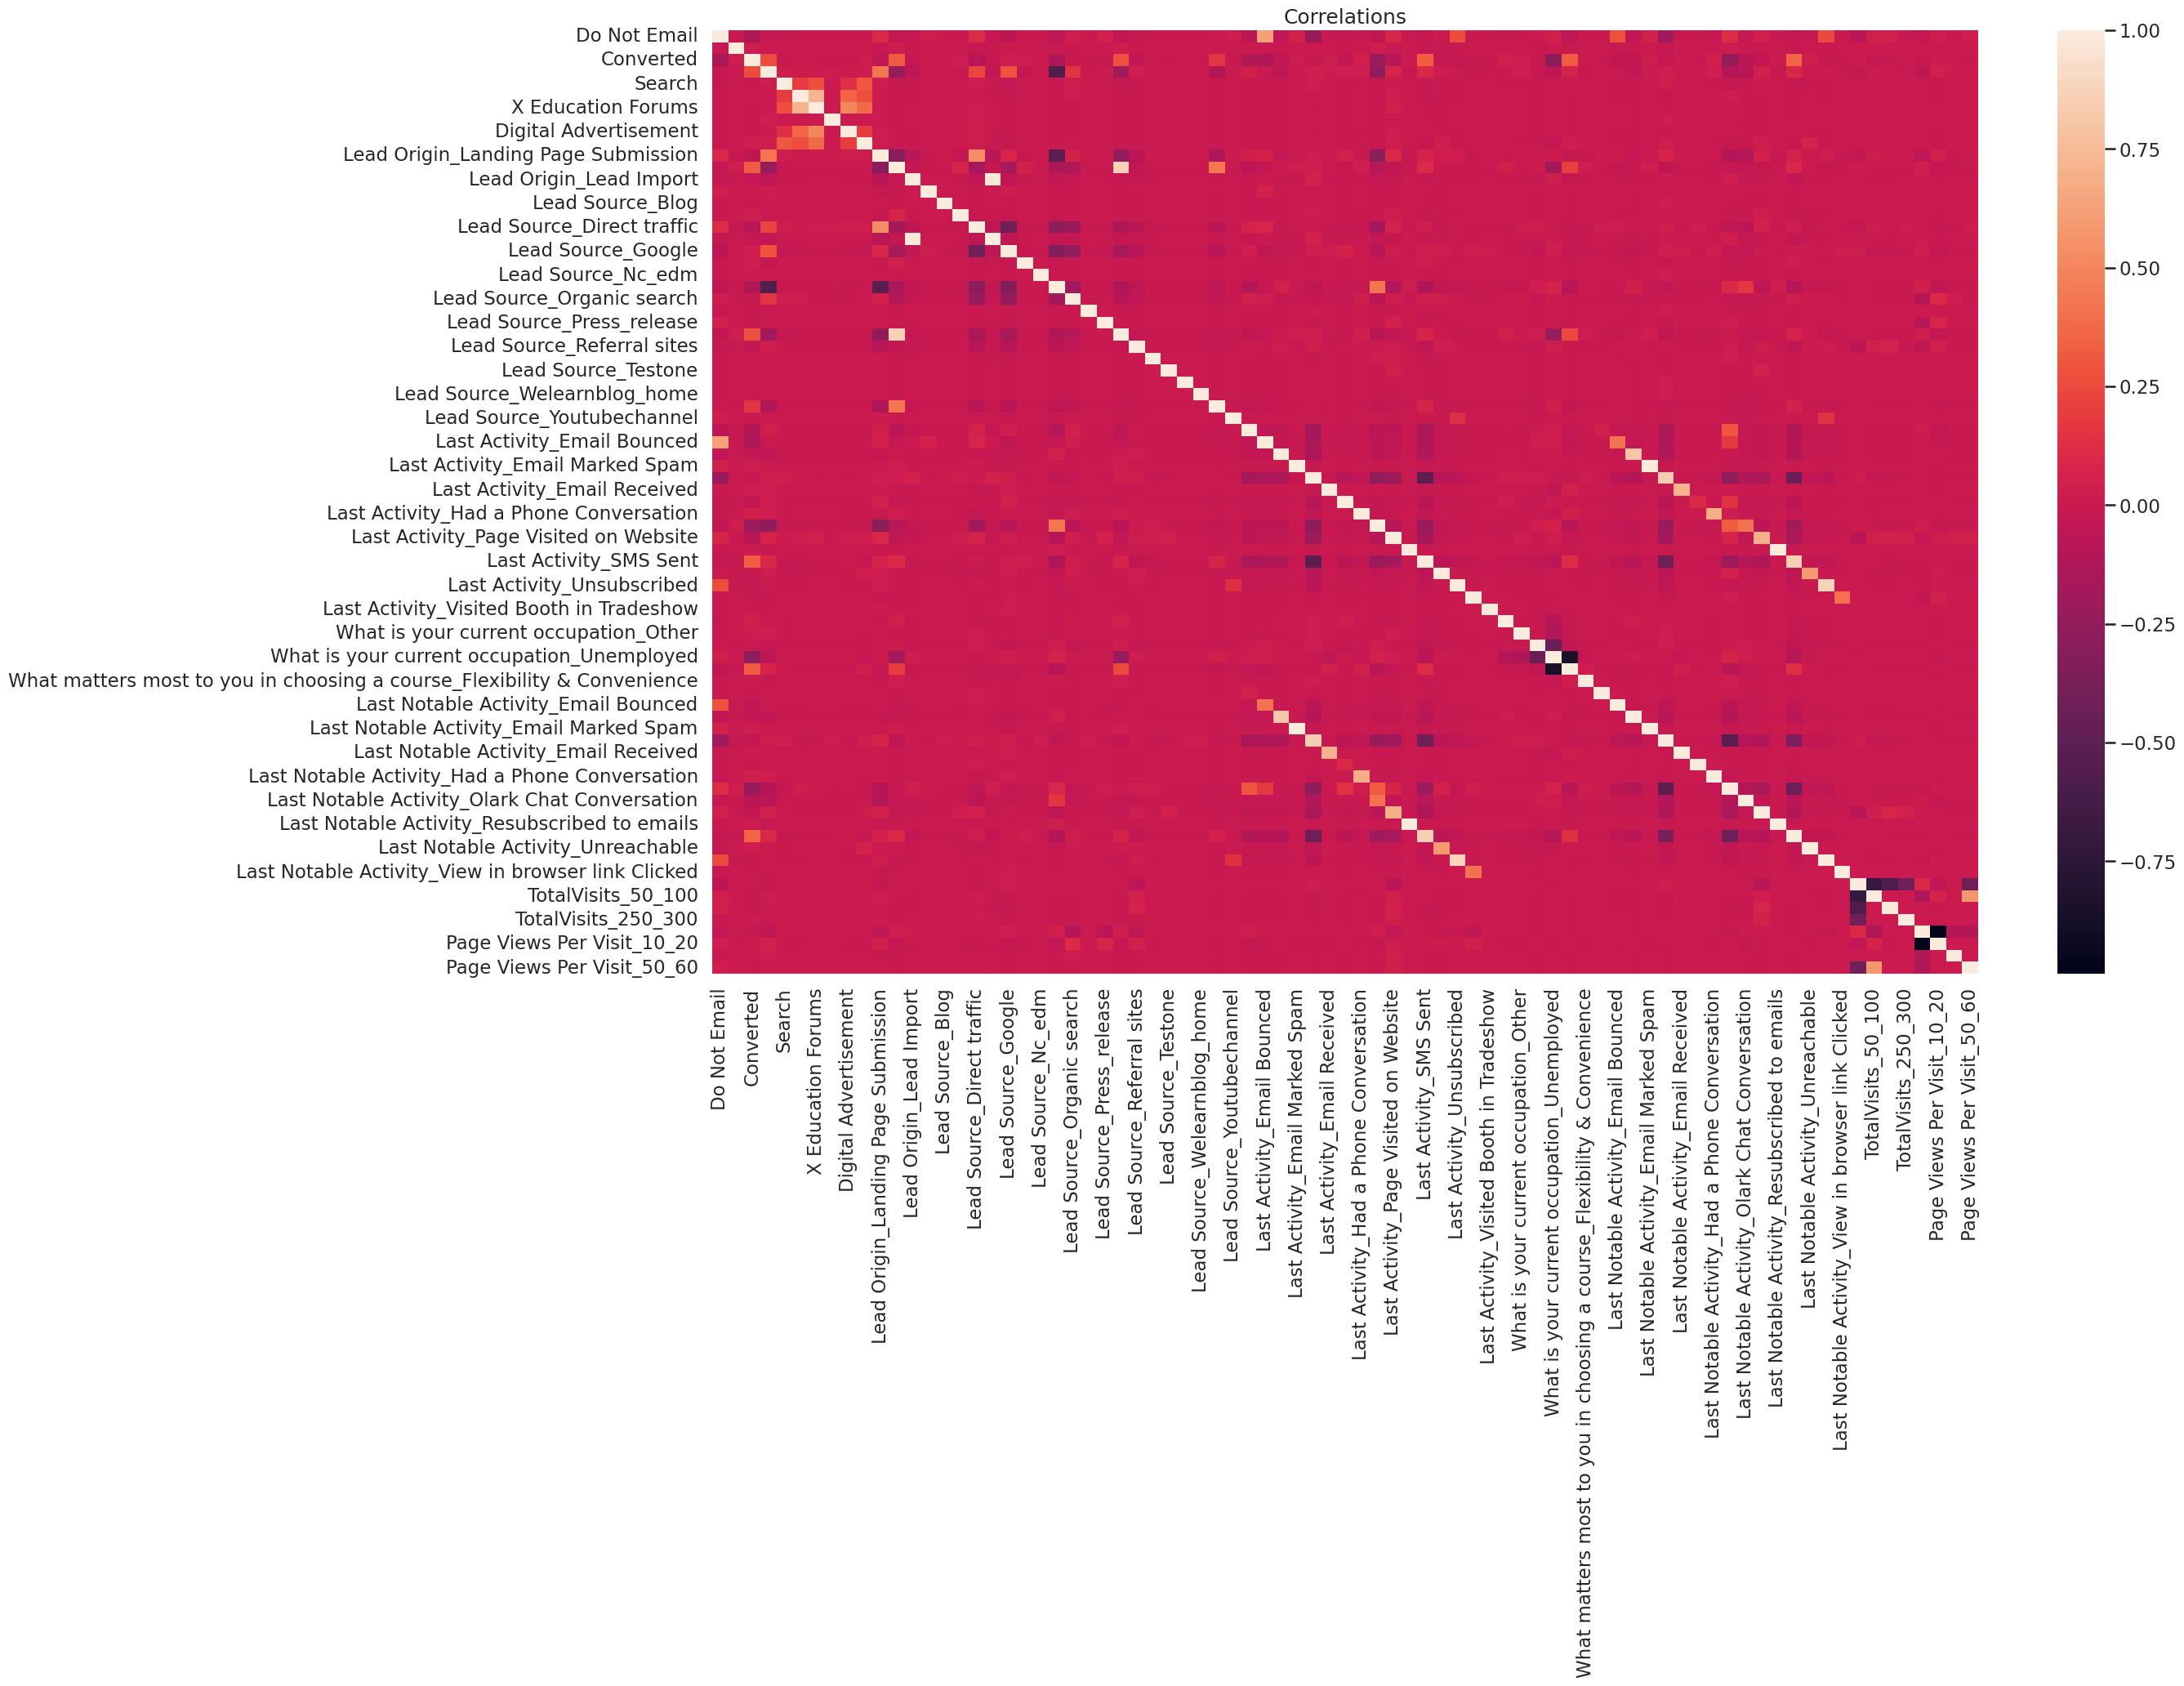

In [59]:
# setting the figure size

plt.figure(figsize=(25,15))

# setting the title

plt.title('Correlations')

# Plotting a heatmap

sns.heatmap(edu_df.corr(method='spearman'))

plt.show()

From the above heatmap, we saw that there are two variables having high correlation, so we going to drop them.

**Dropping highly correlated dummy variable/categories**

In [60]:
corr_dummy=['Lead Source_Olark chat','What is your current occupation_Unemployed']

X_train=X_train.drop(corr_dummy,axis=1)      # dropping from X train set

X_test=X_test.drop(corr_dummy,axis=1)       # dropping from X test set

### Checking again the correlation of the dataset

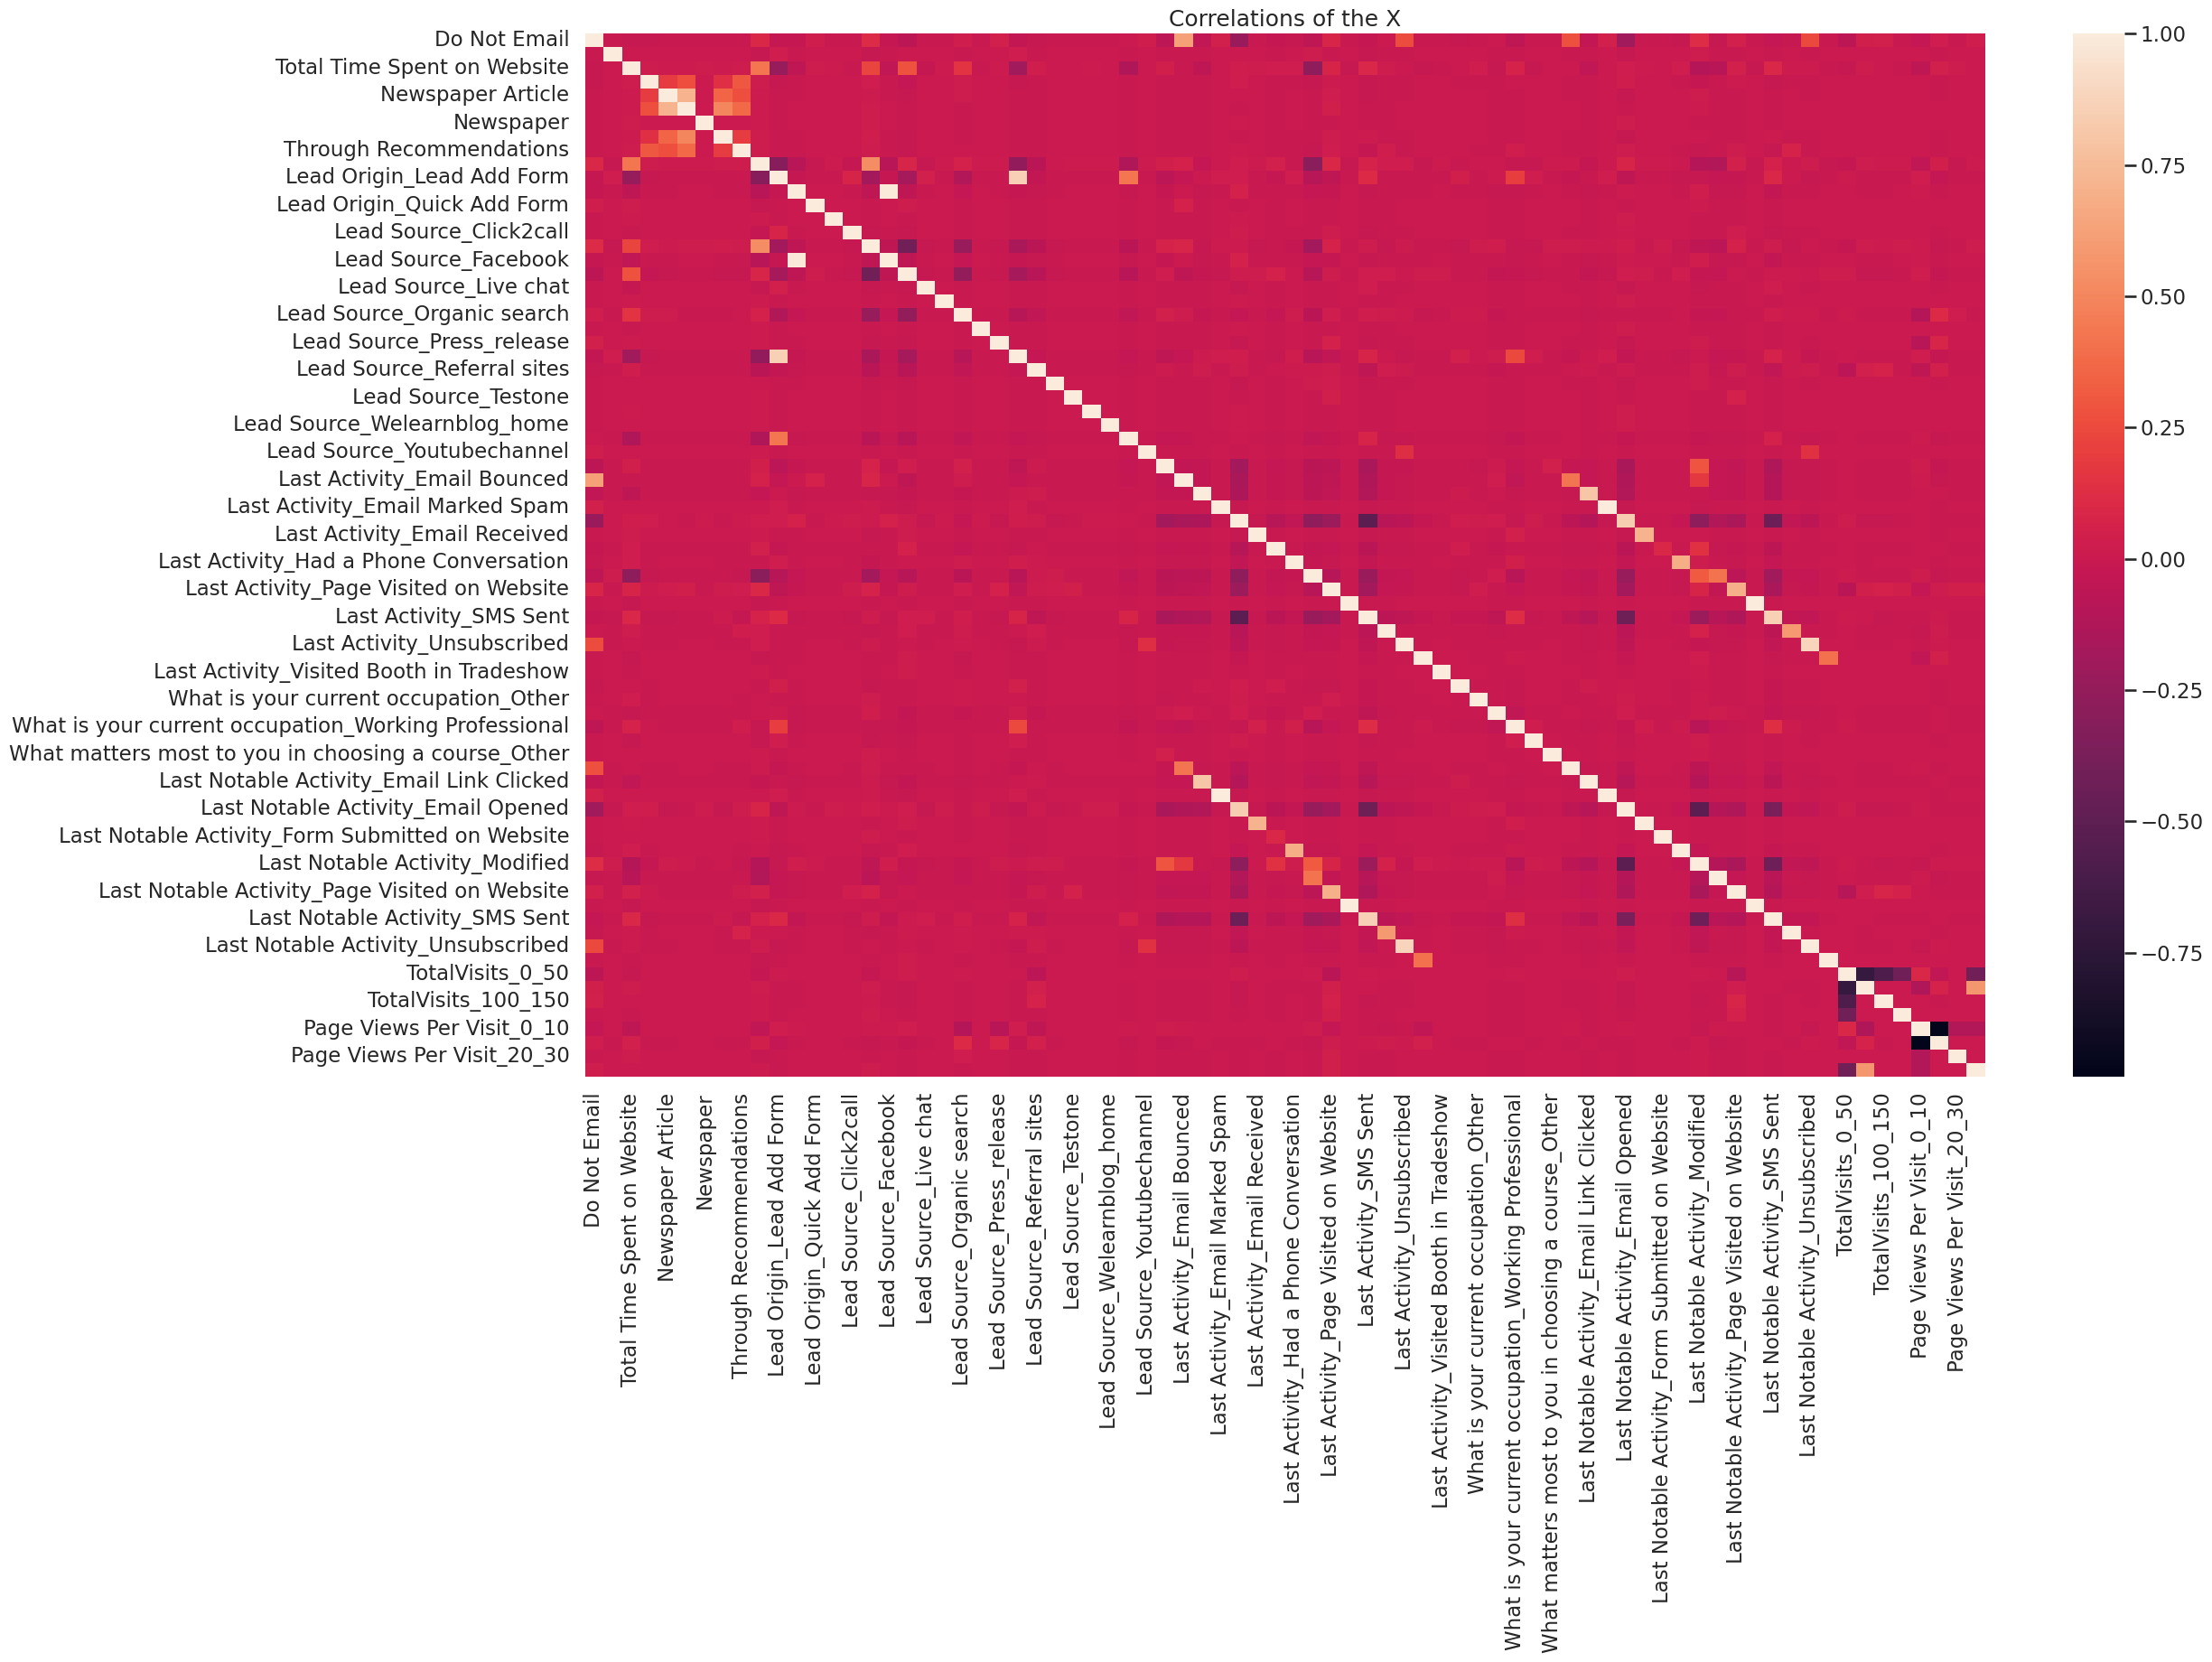

In [61]:
# setting the figure size

plt.figure(figsize=(25,15))

# setting the title

plt.title('Correlations of the X')

# Plotting a heatmap

sns.heatmap(edu_df[X_train.columns].corr(method='spearman'))

plt.show()

Now, both of them are removed and new correlation is shown above by heatmap, We will now proceed with building our model based on the p-values and VIFs, we will again check for correlation as from above heatmap it is difficult to spot the highly correlated variables.

# Building a Model

In [62]:
# importing necessary library

import statsmodels.api as sm

In [63]:
X_train= X_train.astype(float)  # This will convert bool to 0/1 as float, and ints/floats are unchanged


In [64]:
logis=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())
logis.fit().summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['familt']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6398
Model Family:                Gaussian   Df Model:                           69
Link Function:               Identity   Scale:                         0.13678
Method:                          IRLS   Log-Likelihood:                -2709.0
Date:                Fri, 25 Jul 2025   Deviance:                       875.17
Time:                        07:58:31   Pearson chi2:                     875.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5207
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    7.503e+11   9.73e+11      0.771      0.441   -1.16e+12    2.66e+12
Do Not Email                                                               -0.1235      0.025     -5.038      0.000      -0.172      -0.075
Do Not Call                                                                 0.4940      0.262      1.885      0.059      -0.020       1.008
Total Time Spent on Website                                                 0.1835      0.005     35.228      0.000       0.173       0.194
Search                                                                      0.0874      0.121      0.720      0.471      -0.150       0.325
Newspaper Article                                                           0.6330      0.371      1.708      0.088      -0.093       1.359
X Education Forums                                                         -0.7036      0.611     -1.152      0.249      -1.900       0.493
Newspaper                                                                  -0.6872      0.370     -1.856      0.063      -1.413       0.038
Digital Advertisement                                                      -0.3826      0.262     -1.461      0.144      -0.896       0.131
Through Recommendations                                                     0.1408      0.157      0.895      0.371      -0.168       0.449
Lead Origin_Landing Page Submission                                        -0.0253      0.014     -1.862      0.063      -0.052       0.001
Lead Origin_Lead Add Form                                                   0.4841      0.071      6.793      0.000       0.344       0.624
Lead Origin_Lead Import                                                     0.1787      0.264      0.676      0.499      -0.340       0.697
Lead Origin_Quick Add Form                                                  0.3395      0.371      0.914      0.361      -0.388       1.067
Lead Source_Blog                                                           -0.4799      0.370     -1.296      0.195      -1.206       0.246
Lead Source_Click2call                                                     -0.1593      0.226     -0.706      0.480      -0.602       0.283
Lead Source_Direct traffic                                                 -0.1739      0.020     -8.671      0.000      -0.213      -0.135
Lead Source_Facebook                                                       -0.3495      0.265     -1.321      0.187      -0.868       0.169
Lead Source_Google                                                         -0.1203      0.017     -7.052      0.000      -0.154      -0.087
Lea

From the above summary presented by generalizing linear model, we can tell that there are so many variable with insignificant p-values. Here we will **use rfe** for feature selection as we have 70 variables and checking one by one is not an efficient way to do so.

## Using RFE

In [65]:
# Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg=LogisticRegression()                 # creating an object

## Running RFE with two different variables count to find best model

### RFE Test - 1

In [66]:
# Running rfe for 19 variables

rfem = RFE(logreg,n_features_to_select = 19)

rfem = rfem.fit(X_train,y_train)   # fitting

In [67]:
rfem.support_  # checking for ture and false assigned to the variables after rfe

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [68]:
# selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model

col=X_train.columns[rfem.support_]

X_train_1=sm.add_constant(X_train[col])    # Adding constant

In [69]:
print(X_train_1.shape)
print(y_train.shape)


(6468, 20)
(6468,)


In [70]:
print(type(X_train_1))


<class 'pandas.core.frame.DataFrame'>


In [71]:
print(X_train_1.dtypes)


const                                                   float64
Do Not Email                                            float64
Total Time Spent on Website                             float64
Lead Origin_Lead Add Form                               float64
Lead Source_Direct traffic                              float64
Lead Source_Facebook                                    float64
Lead Source_Organic search                              float64
Lead Source_Referral sites                              float64
Lead Source_Welingak website                            float64
Last Activity_Converted to Lead                         float64
Last Activity_Email Bounced                             float64
Last Activity_Had a Phone Conversation                  float64
Last Activity_Olark Chat Conversation                   float64
What is your current occupation_Housewife               float64
What is your current occupation_Working Professional    float64
Last Notable Activity_Email Link Clicked

In [72]:
X_train_1 = X_train_1.astype(float)  # This will convert bool to 0/1 as float, and ints/floats are unchanged


In [73]:
# creating 1st model after RFE

logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())

reg1=logis1.fit()

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.5
Date:                Fri, 25 Jul 2025   Deviance:                       5429.1
Time:                        07:58:41   Pearson chi2:                 7.36e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3874
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5543      0.074      7.526      0.000       0.410       0.699
Do Not Email                                            -1.2595      0.193     -6.533      0.000      -1.637      -0.882
Total Time Spent on Website                              0.9614      0.035     27.115      0.000       0.892       1.031
Lead Origin_Lead Add Form                                3.1568      0.188     16.766      0.000       2.788       3.526
Lead Source_Direct traffic                              -0.6271      0.082     -7.666      0.000      -0.787      -0.467
Lead Source_Facebook                                    -0.5043      0.504     -1.001      0.317      -1.492       0.483
Lead Source_Organic search                              -0.4153      0.106     -3.905      0.000      -0.624      -0.207
Lead Source_Referral sites                              -0.5181      0.300     -1.728      0.084      -1.106       0.070
Lead Source_Welingak website                             1.9626      0.743      2.641      0.008       0.506       3.419
Last Activity_Converted to Lead                         -1.0716      0.222     -4.827      0.000      -1.507      -0.636
Last Activity_Email Bounced                             -1.0610      0.342     -3.103      0.002      -1.731      -0.391
Last Activity_Had a Phone Conversation                   1.2477      0.678      1.840      0.066      -0.082       2.577
Last Activity_Olark Chat Conversation                   -0.9186      0.192     -4.790      0.000      -1.294      -0.543
What is your current occupation_Housewife               22.7649   1.39e+04      0.002      0.999   -2.73e+04    2.73e+04
What is your current occupation_Working Professional     2.7719      0.188     14.770      0.000       2.404       3.140
Last Notable Activity_Email Link Clicked                -1.7500      0.276     -6.333      0.000      -2.292      -1.208
Last Notable Activity_Email Opened                      -1.3111      0.086    -15.208      0.000      -1.480      -1.142
Last Notable Activity_Modified                          -1.7095      0.099    -17.310      0.000      -1.903      -1.516
Last Notable Activity_Olark Chat Conversation           -1.3940      0.371     -3.760      0.000      -2.121      -0.667
Last Notable Activity_Page Visited on Website           -1.5885      0.189     -8.425      0.000      -1.958      -1.219
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.


## Calculating VIF

In [74]:
# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X_train_1[col].columns

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif   # Viewing the dataset

,Features,VIF
16,Last Notable Activity_Modified,2.07
0,Do Not Email,1.86
11,Last Activity_Olark Chat Conversation,1.81
9,Last Activity_Email Bounced,1.80
2,Lead Origin_Lead Add Form,1.43
3,Lead Source_Direct traffic,1.43
17,Last Notable Activity_Olark Chat Conversation,1.33
15,Last Notable Activity_Email Opened,1.26
7,Lead Source_Welingak website,1.24
8,Last Activity_Converted to Lead,1.24


**As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.**

As expained before we will drop the highest in-significant features i.e **'What is your current occupation_Housewife'** having 0.999 p - value.

Now, from the above summary we can say that all the variables present in this model are **significant** as no variables is having p - value greater than 5% hence we can proceed with our next step

## Creating VIF

After creating a model with no in significant features lets check the VIF i.e multicollinearity as we have checked earlier there was no such thing were found after creating VIF - all VIF vallues are less than 5 which means our **final model is ready**.

As confirmed earlier, **no sign of multicollinearity** shown from above vif dataframe hence reg5 is our final model and we are going to use it predict the X train dataset.

## Predicting a Train model

In [ ]:
# Predicting the train dataset with our final model

y_train_pred=reg5.predict(X_train_5)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows


## ROC Curve Plotting

- ROC curve shows the trade off between sensitivity and specificity - means if sensitivity increases specificity will decrease.
- The curve closer to the left side border then right side of the border is more accurate.
- The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [ ]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def edu_roc( real, probability ):

    # Creating roc curve values like false positive rate , true positive rate and threshold

    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )

    # Calculating the auc score(area under the curve)

    auc_score = roc_auc_score( real, probability )

    # Setting the figure size

    plt.figure(figsize=(8, 4))

    # Plotting the roc curve

    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )

    # Plotting the 45% dotted line
    plt.plot([0, 1], [0, 1], 'r--')

    # Setting the x axis linit

    plt.xlim([0.0, 1.0])

    # Setting the y axis limit

    plt.ylim([0.0, 1.05])

    # Setting the x axis label

    plt.xlabel('False Positive Rate')

    # Setting the y axis label

    plt.ylabel('True Positive Rate')

    # Setting the title

    plt.title('Receiver operating characteristic')

    # Setting the legend on the left below to show the value of auc

    plt.legend(loc="lower right")

    # Showing the plot

    plt.show()

    return None   # no return

In [ ]:
# Calling the roc curve for plotting

edu_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Points to be concluded from above roc curve -
- The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
- The area under the curve is 88% of the total area.

#### Finding optimal probability cutoff point

In [ ]:
# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

Now, after creating series of points let's check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding **'Accuracy'**, **'Sensitivity'** and **'Specificity'** for each points. These three methods will tell us how our model is - whether it is having low accuray or high or number of relevance data points is high or low etc.

In [ ]:
# Caculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

As we can see from the above data we have created points for accuracy , sensitivity and specificity for all probability points from 0 to 0.9.
Out of this we have to choose one as a cutoff point and it is **probability cutoff = 0.4** because all the accuracy , sensitivity and specificity are having nearly same value which is an ideal point to consider for as we can't ignore any one from three.

Let's plot this data and see the convergent point or meeting point for all three point 'accuracy' , 'sensitivity' and 'specificity'

In [ ]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.show()

From the above curve, 0.4 is the optimum point for taking probability cutoff as the meeting point is slightly before from 0.4 hence final cutoff we choose is **0.40**. Also we can see that there is a trade off between sensitivity and specificity.

In [ ]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value

y_train_pred_final.head()

## Precision and Recall

Let's create precision and recall using confusion matrix for the final dataset ass we know that to attain more stability and predict successfully in our model one needs to check these two important methods which not only will tell us how our model is but also it will show us some insight like what is the score for result relevancy and how many truly relevant results are returned.

In [ ]:
# Creating confusion matrix to find precision and recall score

confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

In [ ]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    # Printing Pecision score
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       # Printing Recall score

Important point to be noted from the outcomes for precision and recall score -
- Our precison percentage is 73% approximately and recall  percentage is 79%
- This means we have very good model which explains relevancy of 73% and true relevant results about 79%.

**As per our business objective, the recall percentage I will consider more valuable because it is okay if our precision is little low which means less hot lead customers but we don't want to left out any hot leads which are willing to get converted hence our focus on this will be more on Recall than Precision.**

### Precision and Recall trade-off

As we all know that Precision and Recall are inversely related means if one increases other will genuinely decrease. Hence we need to see the trade off between these two.
Let's check that in below graph.

In [ ]:
# importing precision recall curve from sklearn library

from sklearn.metrics import precision_recall_curve

In [ ]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

**As we can see that there is a trade off between Precision and Recall and the meeting point is nearly at 0.5**

### RFE Test - 2

In [ ]:
# Running RFE with variables 15

rfem2= RFE(logreg, 15)
rfem2= rfem2.fit(X_train,y_train)
rfem2.support_

In [ ]:
# selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model

col2=X_train.columns[rfem2.support_]

X_train_rfe2=sm.add_constant(X_train[col2])    # Adding constant

In [ ]:
# creating 1st model after RFE

logis_rfe2=sm.GLM(y_train,X_train_rfe2,family=sm.families.Binomial())

reg_rfe2=logis_rfe2.fit()

reg_rfe2.summary()

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.


## Calculating VIF

In [ ]:
# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X_train_rfe2[col2].columns

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X_train_rfe2[col2].values,i) for i in range(X_train_rfe2[col2].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif   # Viewing the dataset

**As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.**

As expained before we will drop the highly in-significant features i.e **'What is your current occupation_Housewife'** having 0.999 p - value.

In [ ]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant

X_train_rfe22=X_train_rfe2.drop(['const','What is your current occupation_Housewife'],1)

In [ ]:
# Creating a new model

X_train_rfe22=sm.add_constant(X_train_rfe22)                              # Adding constant
logis_rfe22=sm.GLM(y_train,X_train_rfe22,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe22=logis_rfe22.fit()                                                 # Fitting our model
reg_rfe22.summary()                                                    # Showing the summary of the model created

Again, we can see from above summary that variable **'Last Activity_Had a Phone Conversation'** is in-significant hence dropping it and recreating a new model.

In [ ]:
# Dropping the most insignificant values ('Last Activity_Had a Phone Conversation') and constant

X_train_rfe23=X_train_rfe22.drop(['const','Last Activity_Had a Phone Conversation'],1)

In [ ]:
# Creating a new model

X_train_rfe23=sm.add_constant(X_train_rfe23)                              # Adding constant
logis_rfe23=sm.GLM(y_train,X_train_rfe23,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe23=logis_rfe23.fit()                                                 # Fitting our model
reg_rfe23.summary()                                                    # Showing the summary of the model created

Again, from above summary we can see that one variable **'Last Notable Activity_Email Bounced'** is insignificant hence dropping from the dataset.

In [ ]:
# Dropping the most insignificant values ('Last Activity_Had a Phone Conversation') and constant

X_train_rfe24=X_train_rfe23.drop(['const','Last Notable Activity_Email Bounced'],1)

In [ ]:
# Creating a new model

X_train_rfe24=sm.add_constant(X_train_rfe24)                              # Adding constant
logis_rfe24=sm.GLM(y_train,X_train_rfe24,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe24=logis_rfe24.fit()                                                 # Fitting our model
reg_rfe24.summary()                                                    # Showing the summary of the model created

Now, from the above summary we can see that there is still one in-significant variable present in the dataset i.e **'Last Activity_Email Bounced'**, hence we need to drop this variable and recreate a new model.

In [ ]:
# Dropping the most insignificant values ('Last Activity_Had a Phone Conversation') and constant

X_train_rfe25=X_train_rfe24.drop(['const','Last Activity_Email Bounced'],1)

In [ ]:
# Creating a new model

X_train_rfe25=sm.add_constant(X_train_rfe25)                              # Adding constant
logis_rfe25=sm.GLM(y_train,X_train_rfe25,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe25=logis_rfe25.fit()                                                 # Fitting our model
reg_rfe25.summary()                                                    # Showing the summary of the model created

Now, from the above summary we can say that all the variables present in this model are **significant** as variables are having p - value equal to 0 hence we can proceed with our next step.

### Model Evaluation

In [ ]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value

y_test_pred_final.head()

In [ ]:
# Checking the accuracy of the test dataset.

from sklearn import metrics    # Imprting metrics from sklearn

print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the score

In [ ]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the precision score

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))      # Printing the recall score

## Lead Score assigning

In [ ]:
# Creating new columns for lead number and lead score

y_test_pred_final['Lead Number']=edu_df1.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))


y_test_pred_final.head()

# Conclusion

Valuable Insights -
 - The Accuracy, Precision and Recall score we got from test set in aceptable range.
 - We have high recall score than precision score which we were exactly looking for.
 - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
 - This concludes that the model is in stable state.
 - Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
    - **Last Notable Activity_Had a Phone Conversation**
    - **Lead Origin_Lead Add Form** and
    - **What is your current occupation_Working Professional**

# EDA

In [2]:
!pip install visualizer fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=c59378b0dce36eec283b76ccd56f23b731cfe7fac87aad10efb36d0fce49e5d2
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=1452e08b2da4572e7a2dc9fa949bb3f9a995b07ff90c098a8edd4cc4207e4530
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


In [ ]:
#importing libraries

import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import plotly.express as px
from pandas import plotting
import missingno as ms
from sklearn.impute import SimpleImputer
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from visualizer import Visualizer
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
df = edu_df1.copy()

In [ ]:
plt.title("Null Values Plot")
ms.bar(df, color = 'slategrey')

## Data Cleaning

In [ ]:
num_col = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].keys()
cat_col = df.dtypes[~(df.dtypes == 'int64') & ~(df.dtypes == 'float64')].keys()
num_df = df[num_col]
cat_df = df[cat_col]


In [ ]:
num_df

### Numerical

In [ ]:
(num_df.isnull().sum()/num_df.shape[0]*100).sort_values(ascending = False)

In [ ]:
se_median = SimpleImputer(missing_values = np.nan, strategy='median')

In [ ]:
num_df[['TotalVisits', 'Page Views Per Visit']] = se_median.fit_transform(num_df[['TotalVisits', 'Page Views Per Visit']])

In [ ]:
num_df.isnull().sum()

In [ ]:
num_df = num_df.drop(['Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1)

### Categorical

In [77]:
(cat_df.isnull().sum()/cat_df.shape[0]*100).sort_values(ascending = False)

NameError: name 'cat_df' is not defined

In [78]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
importances = mutual_info_classif(final_encoded_df, filter_df.iloc[:, -1])
mutual_score = pd.DataFrame([ final_encoded_df.columns, importances], index = ["Features", "Importance"]).T.sort_values(by = "Importance", ascending = False).reset_index().drop("index", axis = 1)

low_score_col = mutual_score[mutual_score["Importance"] == 0].Features.values
high_score_col = mutual_score[mutual_score["Importance"] > 0].Features.values

classif_data = final_encoded_df[high_score_col]
X = classif_data
y = filter_df.iloc[:, -1]

In [ ]:
train, test = train_test_split(pd.concat([X, y], axis = 1), test_size = 0.25)
train.to_csv("train.csv")
test.to_csv("test.csv")

# Model Building

In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visualizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [7]:
train = pd.read_csv("/content/MiQ_03_train.csv")
test = pd.read_csv("/content/MiQ_03_test.csv")

In [8]:
print(train.shape)
print(test.shape)

(6922, 80)
(2308, 80)


In [9]:
train.drop("Unnamed: 0", axis = 1, inplace = True)
test.drop("Unnamed: 0", axis = 1, inplace = True)

In [10]:
x_train = train.drop("Converted", axis = 1)
y_train = train.iloc[:, -1]
x_test = test.drop("Converted", axis = 1)
y_test = test.iloc[:, -1]

In [11]:
pd.set_option('display.max_columns', 500)

In [12]:
x_train.head()

,Tags_Will revert after reading the email,Total Time Spent on Website,Lead Profile_Potential Lead,Last Notable Activity_SMS Sent,Lead Origin_Lead Add Form,Tags_Interested in other courses,Last Activity_SMS Sent,Tags_Ringing,What is your current occupation_Working Professional,Lead Source_Reference,Lead Profile_Unspecified,What is your current occupation_Unemployed,Tags_Closed by Horizzon,Last Notable Activity_Modified,Last Activity_Olark Chat Conversation,Lead Source_Welingak Website,Specialization_Unspecified,Lead Source_Olark Chat,Tags_Still Thinking,Last Activity_Converted to Lead,Tags_switched off,Last Notable Activity_View in browser link Clicked,Tags_Interested in Next batch,Last Notable Activity_Email Link Clicked,Tags_Interested in full time MBA,Tags_Lateral student,Last Activity_Page Visited on Website,Last Notable Activity_Olark Chat Conversation,Last Activity_Email Bounced,City_Tier II Cities,Tags_opp hangup,Tags_Recognition issue (DEC approval),Tags_Lost to EINS,Lead Profile_Student of SomeSchool,Lead Source_Social Media,Do Not Email_Yes,Last Activity_Email Marked Spam,Lead Source_WeLearn,Lead Profile_Other Leads,Specialization_Finance Management,Specialization_E-COMMERCE,City_Other Cities of Maharashtra,Tags_Shall take in the next coming month,Tags_Lost to Others,TotalVisits,Specialization_Hospitality Management,How did you hear about X Education_Word Of Mouth,Specialization_Retail Management,How did you hear about X Education_Student of SomeSchool,Lead Source_Press_Release,City_Thane & Outskirts,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,How did you hear about X Education_Unspecified,Lead Source_Pay per Click Ads,Tags_Diploma holder (Not Eligible),Tags_Not doing further education,Lead Origin_Lead Import,Lead Source_NC_EDM,Specialization_Operations Management,Specialization_Supply Chain Management,Last Notable Activity_Had a Phone Conversation,Lead Source_Live Chat,Lead Source_Organic Search,Tags_University not recognized,City_Unspecified,Specialization_Media and Advertising,Page Views Per Visit,A free copy of Mastering The Interview_Yes,Last Activity_Email Link Clicked,Last Notable Activity_Form Submitted on Website,Lead Source_Others,How did you hear about X Education_SMS,City_Other Cities,Last Notable Activity_Page Visited on Website,Tags_number not provided,Last Notable Activity_Email Marked Spam,Tags_invalid number
0,1,-0.737186,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.383861,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.169195,1,0,0,0,0,0,0,0,0,0
1,0,0.200558,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.285678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.794993,0,0,0,0,0,0,0,0,0,0
2,0,1.972054,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.016039,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.130628,1,0,0,0,0,0,0,0,0,0
3,1,-0.815635,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.383861,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.169195,0,0,0,0,0,0,0,0,0,0
4,0,-0.427037,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.450908,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.530766,1,0,0,0,0,0,0,0,0,0


In [14]:
ct = ColumnTransformer([('se', StandardScaler(), ['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits'])], remainder='passthrough')

In [16]:
random_forest_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(random_state = 42))])
adaboost_pipeline = Pipeline([('transformer', ct), ('Adaboost', AdaBoostClassifier(random_state = 42))])
ExtraTree_pipeline = Pipeline([('transformer', ct), ('ExtraTreeClassifier', ExtraTreesClassifier(random_state = 42))])
BaggingClassifier_pipeline = Pipeline([('transformer', ct), ('BaggingClassifier', BaggingClassifier(estimator = DecisionTreeClassifier(), random_state = 42))])
GradientBoost_pipeline = Pipeline([('transformer', ct), ('GradientBoosting', GradientBoostingClassifier(random_state = 42))])
dtree_pipeline = Pipeline([('transformer', ct), ('DecisionTree', DecisionTreeClassifier(random_state = 42))])
knn_pipeline = Pipeline([('transformer', ct), ('KNN', KNeighborsClassifier())])
lr_pipeline = Pipeline([('transformer', ct), ('LogisticRegression', LogisticRegression(random_state = 42))])
sgd_pipeline = Pipeline([('transformer', ct), ('StochasticGradient', SGDClassifier(random_state = 42))])
mlp_pipeline = Pipeline([('transformer', ct), ('MLPClassifier', MLPClassifier(random_state = 42))])
naive_pipeline = Pipeline([('transformer', ct), ('NaiveBayes', GaussianNB())])
svc_pipeline = Pipeline([('transformer', ct), ('SVM', SVC(random_state = 42))])
lightgbm_pipeline = Pipeline([('transformer', ct), ('lightgbm', LGBMClassifier(random_state = 42))])
catboost_pipeline = Pipeline([('transformer', ct), ('CatBoost', CatBoostClassifier(random_state = 42, silent = True))])
xgboost_pipeline = Pipeline([('transformer', ct), ('XGBoost', XGBClassifier(random_state = 42))])

In [17]:
pipeline_list = [random_forest_pipeline, adaboost_pipeline, ExtraTree_pipeline, BaggingClassifier_pipeline, GradientBoost_pipeline,
                dtree_pipeline, knn_pipeline, lr_pipeline, sgd_pipeline, mlp_pipeline, naive_pipeline, svc_pipeline,
                lightgbm_pipeline, catboost_pipeline, xgboost_pipeline]

In [18]:
pipe_dict = {0: "RandomForest", 1: "Adaboost", 2: "ExtraTree", 3: "BaggingClassifier", 4: "GradientBoosting", 5: "DecisionTree",
            6: "KNN", 7: "Logistic", 8: "SGD Classifier", 9: "MLPClassifier", 10: "NaiveBayes",
            11: "SVM", 12: "LightGBM", 13: "Catboost", 14: "XGBoost"}

In [19]:
for idx, pipe in enumerate(pipeline_list):
    score = cross_val_score(pipe, x_train, y_train, cv = 10, scoring = 'accuracy')
    print(pipe_dict[idx], ":", score.mean())

RandomForest : 0.9063846558066212
Adaboost : 0.8969932604325667
ExtraTree : 0.9008954115890532
BaggingClassifier : 0.9006061857217926
GradientBoosting : 0.9125960263243501
DecisionTree : 0.8747460150639341
KNN : 0.8860164402071916
Logistic : 0.9043602832620173
SGD Classifier : 0.9008945774841728
MLPClassifier : 0.9008931178006323
NaiveBayes : 0.8601548098657925
SVM : 0.9095617612958653
[LightGBM] [Info] Number of positive: 2388, number of negative: 3841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 467
[LightGBM] [Info] Number of data points in the train set: 6229, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383368 -> initscore=-0.475277
[LightGBM] [Info] Start training from score -0.475277
[LightGBM] [Info] Number of positive: 2388, number of neg

In [20]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    predict_train_y = model.predict(x_train)
    predict_test_y = model.predict(x_test)

    print("**Accuracy Score**")
    train_accuracy = accuracy_score(y_train, predict_train_y)
    test_accuracy = accuracy_score(y_test, predict_test_y)
    print("Train Accuracy is: %s"%(train_accuracy))
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")

    print("\n**Accuracy Error**")
    train_error = (1-train_accuracy)
    test_error = (1-test_accuracy)
    print("Train Error: %s"%(train_error))
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")

    print("\n**Classification Report**")
    train_cf_report = pd.DataFrame(classification_report(y_train, predict_train_y, output_dict = True))
    test_cf_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
    print("Train Classification Report:")
    print(train_cf_report)
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")

    print("\n**Confusion Matrix**")
    train_conf = confusion_matrix(y_train, predict_train_y)
    test_conf = confusion_matrix(y_test, predict_test_y)
    print("Train Confusion Matrix Report:")
    print((train_conf))
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

## Random Forest Classifier

In [21]:
rforest = RandomForestClassifier(random_state= 42)
evaluate_model(rforest, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.985408841375325

Test Accuracy is: 0.9137781629116117
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.014591158624674971

Test Error: 0.08622183708838826
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.980623     0.993429  0.985409     0.987026      0.985533
recall        0.996017     0.968350  0.985409     0.982183      0.985409
f1-score      0.988260     0.980729  0.985409     0.984494      0.985372
support    4268.000000  2654.000000  0.985409  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.910143    0.920143  0.913778     0.915143      0.914060
recall        0.952279    0.853982  0.913778     0.903131      0.913778
f1-score      0.930734    0.885829  

## Gradient Boost

In [22]:
GradientBoost = GradientBoostingClassifier(random_state = 42)
evaluate_model(GradientBoost, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9192429933545219

Test Accuracy is: 0.9155112651646448
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.08075700664547814

Test Error: 0.08448873483535524
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.910378     0.935913  0.919243     0.923146      0.920169
recall        0.963918     0.847400  0.919243     0.905659      0.919243
f1-score      0.936383     0.889460  0.919243     0.912922      0.918392
support    4268.000000  2654.000000  0.919243  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.910945    0.923536  0.915511     0.917241      0.915877
recall        0.954416    0.855088  0.915511     0.904752      0.915511
f1-score      0.932174    0.887995  

## LightGBM

In [23]:
lgbm = LGBMClassifier(random_state=42)
evaluate_model(lgbm, x_train, y_train, x_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2654, number of negative: 4268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 6922, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383415 -> initscore=-0.475077
[LightGBM] [Info] Start training from score -0.475077
**Accuracy Score**
Train Accuracy is: 0.9459693730135799

Test Accuracy is: 0.9172443674176777
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.05403062698642014

Test Error: 0.08275563258232232
---------------------------------------------------------

**Classification Report**
Train Classification Report:
             

## Catboost

In [24]:
catboost_classif = CatBoostClassifier(random_state=42, silent = True)
evaluate_model(catboost_classif, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9422132331696041

Test Accuracy is: 0.9207105719237435
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.05778676683039585

Test Error: 0.0792894280762565
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.936766     0.951885  0.942213     0.944325      0.942563
recall        0.971884     0.894499  0.942213     0.933191      0.942213
f1-score      0.954002     0.922300  0.942213     0.938151      0.941847
support    4268.000000  2654.000000  0.942213  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.920744    0.920653  0.920711     0.920699      0.920709
recall        0.951567    0.872788  0.920711     0.912177      0.920711
f1-score      0.935902    0.896082  0

## RF Hyper parameter Tuning

In [26]:
new_pipeline = Pipeline([('transformer', ct), ('classifier', RandomForestClassifier(random_state=42))])

rf_params = [{
                'classifier': [RandomForestClassifier()],
                'classifier__n_estimators': np.arange(100,2000, 200),
                'classifier__max_depth': [None, 10, 20, 30, 50, 70, 80, 100],
                'classifier__min_samples_split': [2, 3, 5, 7, 10],
                'classifier__min_samples_leaf': [1,2,3,4,5,],
                'classifier__max_features': ['auto', 'sqrt', 'log2'],
                'classifier__bootstrap': [True, False]
               }]
random_search = RandomizedSearchCV(estimator = new_pipeline, param_distributions = rf_params, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

best_rf_model = random_search.fit(x_train, y_train)

In [27]:
best_rf_model.best_params_

{'classifier__n_estimators': np.int64(1300),
 'classifier__min_samples_split': 3,
 'classifier__min_samples_leaf': 5,
 'classifier__max_features': 'sqrt',
 'classifier__max_depth': None,
 'classifier__bootstrap': True,
 'classifier': RandomForestClassifier()}

In [28]:
print("Best Score: %s" %(best_rf_model.best_score_))

Best Score: 0.9089839351400044


In [29]:
best_rf_model.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=5, min_samples_split=3,
                                        n_estimators=np.int64(1300)))])

In [30]:
rf_classif_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto', bootstrap = False, max_depth = None, random_state = 42))])

In [31]:
rf_classif_pipeline.fit(x_train, y_train)

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [ ]:
test_prediction = rf_classif_pipeline.predict(x_test)

In [ ]:
accuracy_score(y_test, test_prediction)

In [ ]:
def check_metric(y_test, y_predict):

    print("**Accuracy Score**")
    test_accuracy = accuracy_score(y_test, y_predict)
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")

    print("\n**Accuracy Error**")
    test_error = (1-test_accuracy)
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")

    print("\n**Classification Report**")
    test_cf_report = pd.DataFrame(classification_report(y_test, y_predict, output_dict = True))
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")

    print("\n**Confusion Matrix**")
    test_conf = confusion_matrix(y_test, y_predict)
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

In [ ]:
check_metric(y_test, test_prediction)

## Cat Hyper parameter Tuning

In [ ]:
cb_new_pipeline = Pipeline([('transformer', ct), ('classifier', CatBoostClassifier(random_state=42, task_type = 'CPU', silent = True, eval_metric = 'accuracy'))])

In [ ]:
catboost_params = [{
    'classifier': [CatBoostClassifier()],
    'classifier__iterations': [10],
    'classifier__learning_rate': [0.0001, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'classifier__depth': [2,4,6,8,10,12],
    'classifier__l2_leaf_reg': [2,3,5,7,9,11,12,15,18,20,25,27],
    'classifier__random_strength': [1],
    'classifier__border_count': [50, 100, 150, 200, 254],
}]

In [ ]:
cb_random_search = RandomizedSearchCV(estimator = cb_new_pipeline, param_distributions = catboost_params, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

In [ ]:
cb_random_search.fit(x_train, y_train)

In [ ]:
cb_random_search.best_params_

In [ ]:
cb_random_search.best_score_

In [ ]:
catboost_model = CatBoostClassifier(random_strength=1, learning_rate=0.5, l2_leaf_reg=7, iterations=10, depth=10, border_count=50,
                                    silent = True, eval_metric='Accuracy', task_type='CPU')

In [ ]:
catboost_model.fit(x_train, y_train, silent = True, plot = True)

In [ ]:
y_test_predict = catboost_model.predict(x_test)

In [ ]:
check_metric(y_test, y_test_predict)